__собираем статистики по объявлениям__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
# import re
# from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# tqdm.pandas()

In [3]:
# !ls -1 data

## считываем данные

In [4]:
data_file = 'data/data.pkl'

In [11]:
cols = ['title','adr','latitude','longitude','priceM','ts']
df = pd.read_pickle(data_file)
print(len(df))
df.sample(3)[cols]

7896


,title,adr,latitude,longitude,priceM,ts
826,"3-к. квартира, 75,6 м², 9/9 эт.","улица Токарева, 7 этап, блок-секция 3",44.58,33.51,10.21,2022-09-02 13:04:00
3658,"1-к. квартира, 42,3 м², 3/8 эт.","улица Павла Корчагина, стр. 8",44.58,33.43,8.03,2022-09-02 13:04:00
7275,"2-к. квартира, 60,6 м², 3/5 эт.","Античный проспект , 18",44.59,33.44,12.20,2022-09-05 14:02:00


In [13]:
# берём самые свежие объявления
cols = ['title','adr','latitude','longitude','priceM']
df = df[ df['ts'] == df['ts'].max() ].reset_index(drop=True)
df[cols]

,title,adr,latitude,longitude,priceM
0,"1-к. квартира, 29 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",44.58,33.51,5.08
1,"1-к. квартира, 48,1 м², 3/8 эт.","проспект Победы, 29В",44.58,33.56,7.21
2,"2-к. квартира, 77,9 м², 1/9 эт.","улица Горпищенко, д. 139",44.59,33.56,8.96
3,"2-к. квартира, 59 м², 6/9 эт.","улица Токарева, 7 этап, блок-секция 2",44.58,33.51,8.26
4,"1-к. квартира, 33,5 м², 7/9 эт.","улица Токарева, 7 этап, блок-секция 3",44.58,33.51,5.86
...,...,...,...,...,...
3917,"2-к. квартира, 79,9 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 3",44.58,33.51,10.79
3918,"2-к. квартира, 77,8 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 2",44.58,33.51,10.50
3919,"2-к. квартира, 77,8 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",44.58,33.51,10.50
3920,"2-к. квартира, 81 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",44.58,33.51,10.94


In [14]:
gdf = gpd.GeoDataFrame( 
    df[['avito_id','title','adr','priceM','latitude','longitude']],
    geometry = gpd.points_from_xy(df['longitude'], df['latitude']),
    crs='epsg:4326', # WGS 84
)

gdf

,avito_id,title,adr,priceM,latitude,longitude,geometry
0,2505211407,"1-к. квартира, 29 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",5.08,44.58,33.51,POINT (33.50709 44.58029)
1,2409803367,"1-к. квартира, 48,1 м², 3/8 эт.","проспект Победы, 29В",7.21,44.58,33.56,POINT (33.56361 44.58404)
2,2537301754,"2-к. квартира, 77,9 м², 1/9 эт.","улица Горпищенко, д. 139",8.96,44.59,33.56,POINT (33.56304 44.59436)
3,2505519806,"2-к. квартира, 59 м², 6/9 эт.","улица Токарева, 7 этап, блок-секция 2",8.26,44.58,33.51,POINT (33.50709 44.58029)
4,2505012783,"1-к. квартира, 33,5 м², 7/9 эт.","улица Токарева, 7 этап, блок-секция 3",5.86,44.58,33.51,POINT (33.50709 44.58029)
...,...,...,...,...,...,...,...
3917,2505394982,"2-к. квартира, 79,9 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 3",10.79,44.58,33.51,POINT (33.50709 44.58029)
3918,2505118152,"2-к. квартира, 77,8 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 2",10.50,44.58,33.51,POINT (33.50709 44.58029)
3919,2505647135,"2-к. квартира, 77,8 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",10.50,44.58,33.51,POINT (33.50709 44.58029)
3920,2504965141,"2-к. квартира, 81 м², 1/9 эт.","улица Токарева, 7 этап, блок-секция 1",10.94,44.58,33.51,POINT (33.50709 44.58029)


In [ ]:
# ctx.add_basemap(
#     gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), crs=gdf.crs, 
#     zoom=15,
#     # source=ctx.providers.Stamen.TonerLite, 
#     source=ctx.providers.OpenStreetMap.Mapnik,
# )

<AxesSubplot:>

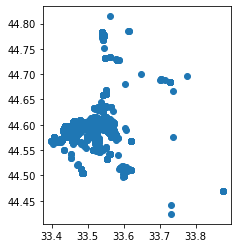

In [15]:
gdf.plot()

## ограничиваем по район поиска

In [ ]:
from shapely.geometry import Polygon

frames_path = 'data/frames/'

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

gdf_frames = gpd.GeoDataFrame([
        {
            'area_name': 'Севастополь, микрорайон Острякова',
            'geometry': df2poly( pd.read_csv(f'{frames_path}/ostr.csv',header=None) ),
        },
        {
            'area_name': 'Севастополь, парк 60-летия СССР',
            'geometry': df2poly( pd.read_csv(f'{frames_path}/park60.csv',header=None) ),
        },
        {
            'area_name': 'Севастополь, Хрусталёва/Хрюкина',
            'geometry': df2poly( pd.read_csv(f'{frames_path}/hru.csv',header=None) ),
        },
    ],crs='epsg:4326',)


In [34]:
gdf_frames['area_id'] = range(len(gdf_frames))

<AxesSubplot:>

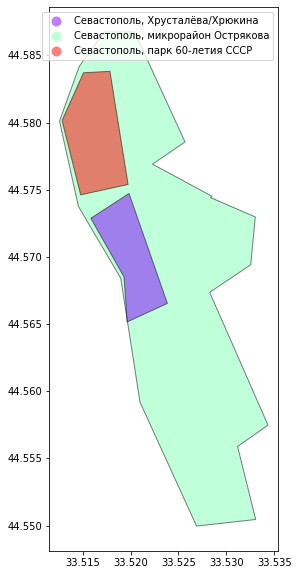

In [35]:
gdf_frames.plot('area_name', legend=True, cmap='rainbow',alpha=.5, edgecolor='k',figsize=(10,10),)  

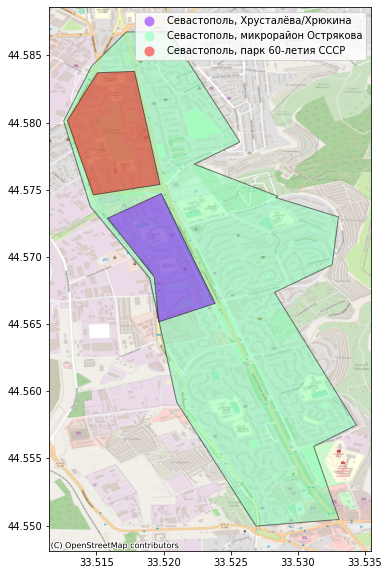

In [33]:
ctx.add_basemap(
    gdf_frames.plot('area_name', legend=True, cmap='rainbow',figsize=(10,10), alpha=.5, edgecolor='k'), 
    crs=gdf.crs, 
    zoom=16,
    # source=ctx.providers.Stamen.TonerLite,
    source=ctx.providers.OpenStreetMap.Mapnik,
)

---

In [36]:
gdf_frames[['area_id','area_name',]]

,area_id,area_name
0,0,"Севастополь, микрорайон Острякова"
1,1,"Севастополь, парк 60-летия СССР"
2,2,"Севастополь, Хрусталёва/Хрюкина"


In [38]:
# gdf_frames[gdf_frames['area_id']==0]

---

In [ ]:
gdf = gdf.sjoin(gdf_frames[gdf_frames['area_id']==0], how='inner', predicate='within')

(<AxesSubplot:>,)

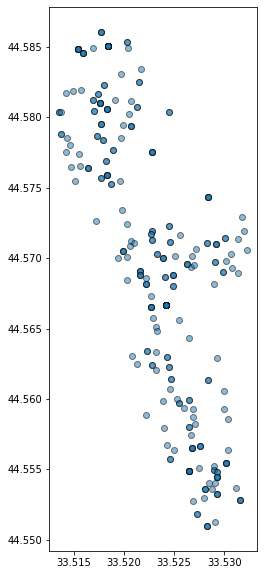

In [40]:
# gdf.plot('area_name', legend=True, cmap='rainbow',figsize=(10,10), alpha=.5, edgecolor='k'), 
gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), 

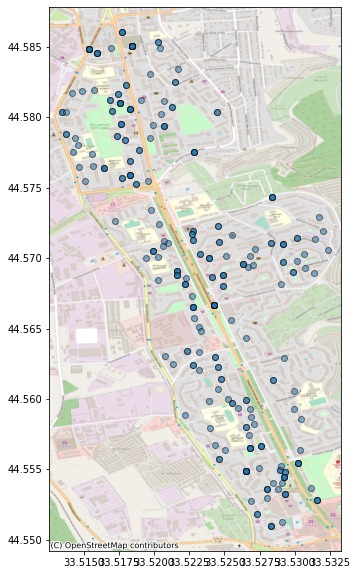

In [41]:
ctx.add_basemap(
    # gdf.plot('area_name', legend=True, cmap='rainbow',figsize=(10,10), alpha=.5, edgecolor='k'), 
    gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), 
    crs=gdf.crs, 
    zoom=16,
    # source=ctx.providers.Stamen.TonerLite,
    source=ctx.providers.OpenStreetMap.Mapnik,
)

---

---

In [43]:
gdf[['priceM']].describe().T

,count,mean,std,min,25%,50%,75%,max
priceM,295.00,8.37,7.50,1.99,6.00,7.20,9.00,93.00


In [44]:
plt_param = {
'alpha':.5, 
'color':'yellow', 
'edgecolors':'blue', 
'figsize':(31,31),
}

ctx_param = {
'source': ctx.providers.OpenStreetMap.Mapnik,
#'source': ctx.providers.Stamen.TonerLite,
'zoom':16,    
}

In [51]:
# gdf_frames.geometry[0]

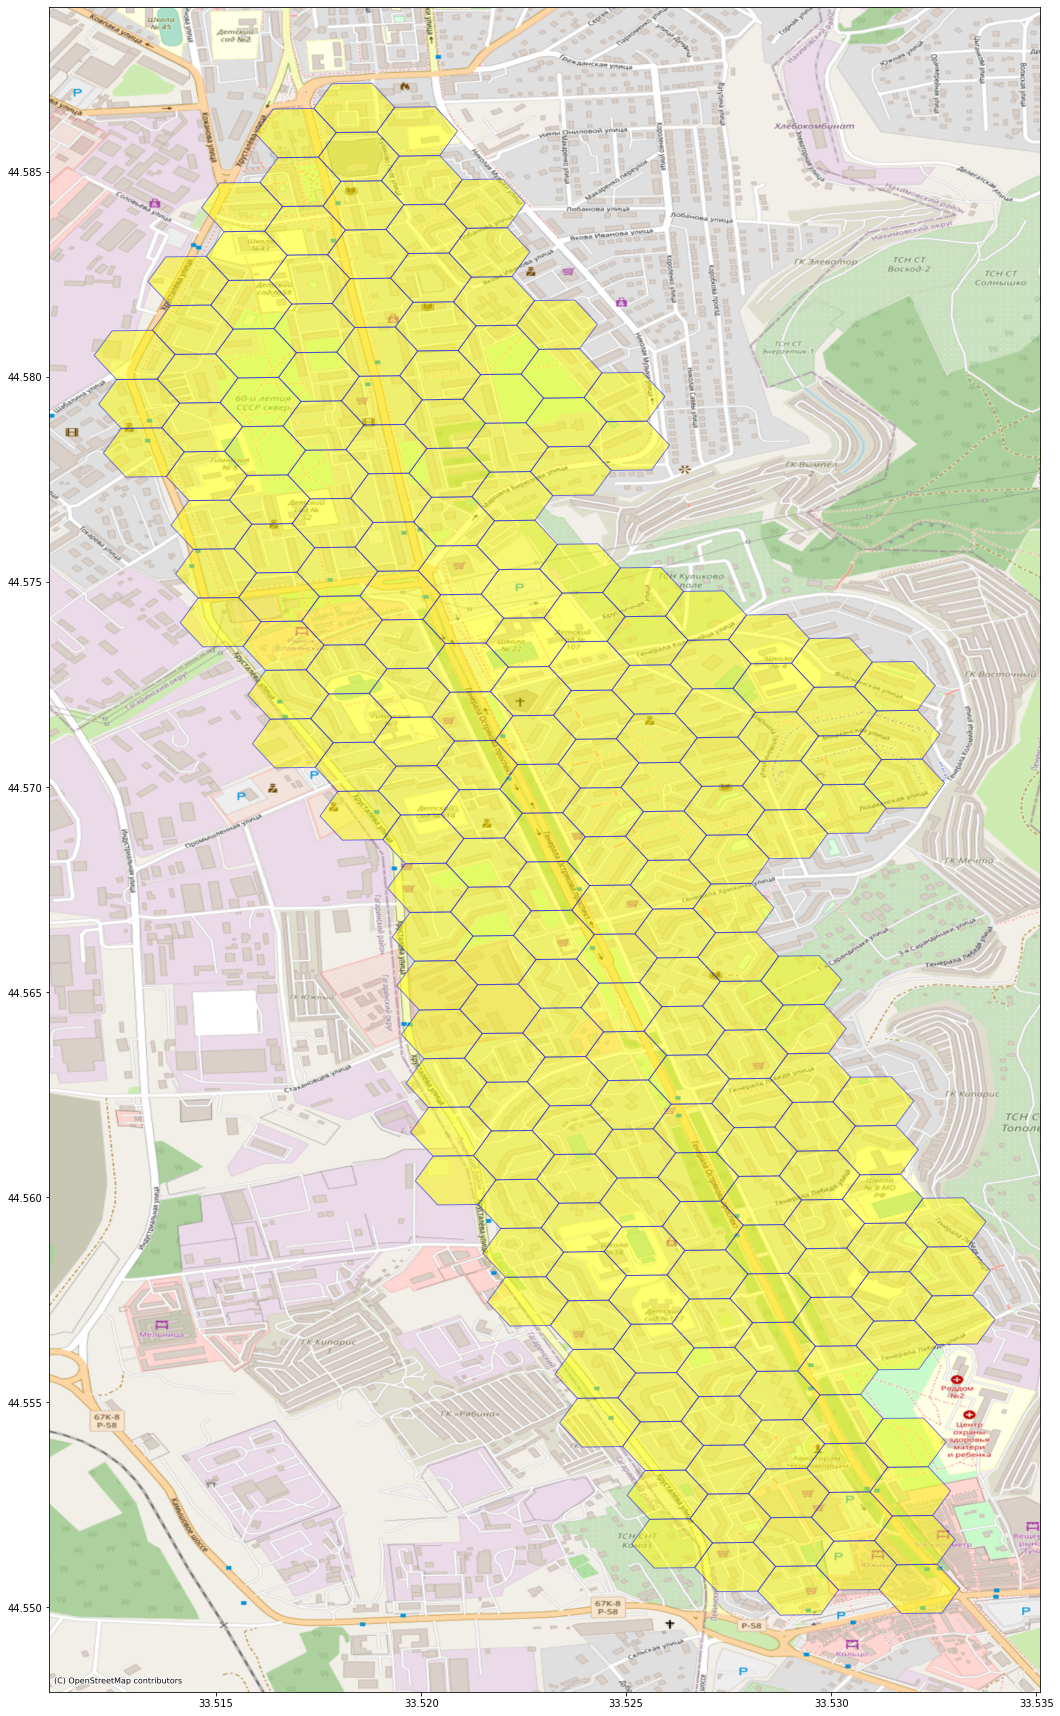

In [52]:
import h3

def cover_grid_hexagonal(gtr,cell_size=10,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = h3.polyfill( gtr.__geo_interface__, cell_size, geo_json_conformant = True )
    return gpd.GeoSeries(
        list(map(polygonise, hexs)), 
        index=hexs, 
        crs=crs, 
    )

grid = cover_grid_hexagonal(gdf_frames.geometry[0])

ctx.add_basemap( grid.plot(**plt_param), crs=grid.crs, **ctx_param, )

In [54]:
# grid

---

In [ ]:
# ctx.providers.Stamen.Watercolor
# ctx.providers.Stamen.TonerLabels
# ctx.providers.Stamen.TonerLite
# ctx.providers.OpenStreetMap.BlackAndWhite

---

In [ ]:
from folium import Map
from folium.features import GeoJson
from folium.plugins import HeatMap

In [ ]:
gjson = gdf_.to_json()

start_pos = (44.578330, 33.516509)

Map( start_pos, zoom_start=14, ).add_child( GeoJson(gjson) )
# Map( start_pos, zoom_start=14, ).add_child( gdf_[['latitude','longitude',]].values )

In [ ]:
# Map(
#     location=start_pos,
#     zoom_start=15,
# ).add_child( 
#     HeatMap( gdf_[['latitude','longitude',]],radius=12.,min_opacity=3. )
# )


---

In [ ]:
# df_ = df.query(
#     '~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)'
#     '&(nrooms==2)'
# )

# df_[['priceM']].describe().T    

In [ ]:
# cols = ['adr', 'priceM', 'nrooms', 'floor', 'nfloors', 'area', 'description', 'avito_id',]
# df_[cols].sort_values(by=['priceM'])[:20]